<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/master/Class_01_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 1: Getting Started with Python**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)


### Module 1 Material

* Part 1.1: Course Overview 
* Part 1.2: Installing Python, Miniconda and Jupyter Lab
* Part 1.3: Introduction to Jupyterlab AI, Google CoLab
* Part 1.4: Python Basics 1 -- Strings, Variables and Indexing
* Part 1.5: Python Basics 2 -- Numbers, Booleans, Operators and Comparisons
* Part 1.6: Python Basics 3 -- Lists, Dictionaries, Sets and JSON
* Part 1.7: Python Basics 4 -- Conditionals and Loops
* **Part 1.8: Python Basics 5 -- Packages, Numpy arrays and Matplotlib**
* Part 1.9: Python Basics 6 -- Pandas and File Handling

### Lesson Setup

For credit, you must run the next code cell first to load necessary packages.

In [1]:
# You MUST run this code cell first
import os
import shutil
path = '/'
memory = shutil.disk_usage(path)
dirpath = os.getcwd()
print("Your current working directory is : " + dirpath)
print("Disk", memory)

Your current working directory is : C:\Users\David\BIO1173\Class_01_8
Disk usage(total=4000108531712, used=998054838272, free=3002053693440)


### Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


# Part 1.8: Packages, Numpy arrays and Matplotlib

Python modules and packages are essential for organizing and reusing code in a modular and scalable manner. They play a crucial role in enhancing code readability, maintainability, and code reuse, reducing duplication and improving overall development efficiency.

* **Modularity:** Python modules allow you to break down your code into smaller, more manageable units. Each module contains related functions, classes, and variables, enabling easier navigation and understanding of the codebase. Modules help maintain a clean and structured code architecture.
* **Code Reuse:** Modules facilitate code reuse by allowing you to import and utilize functions, classes, and variables defined in one module into another. This saves time and effort by avoiding duplication of code, preventing errors and inconsistencies, and promoting the DRY (Don't Repeat Yourself) principle.
* **Collaboration:** Modules simplify collaboration among developers. Different team members can work on different modules simultaneously, and when combined, they form a cohesive software solution. Modules also provide a well-defined interface, allowing team members to understand how to interact with each module, facilitating coordination and collaboration.
* **Namespace Management:** Modules create isolated namespaces, which avoid clashes between function and variable names. Each module has its namespace, preventing naming conflicts. This enables you to have functions or variables with the same name in different modules without any issues.
* **Packages:** Packages are a way to organize related modules into a hierarchical directory structure. Packages provide a means to group modules that are related to each other, making it easier to manage and navigate large codebases. Packages also enable you to create reusable libraries that can be shared with others.
* **Third-Party Libraries:** Python's extensive ecosystem of third-party libraries is built on the concept of modules and packages. These libraries offer a wide range of functionalities that can be easily integrated into your projects. By leveraging existing modules and packages, you can save time and effort in development.

In summary, modules and packages in Python are vital for organizing, reusing, and sharing code. They enhance code maintainability, promote collaboration, prevent naming conflicts, and facilitate the use of third-party libraries. Embracing modular design and leveraging existing modules and packages can significantly improve code quality and development efficiency.



## Arrays and Matrices

An **_array_** is a basic data structure in mathematics and other scientific branches such as physics, biology, and computer science.  Arrays are usually used to store numerical data and play a central role in deep learning programming.

Arrays are classified by their dimensions. The following images shows a 1D, 2D and a 3D array:

![__](https://biologicslab.co/BIO1173/images/class_01/ArrayTypes.png)


A two-dimensional (2D) array is usually referred to as a **_matrix_**. The two dimensions of a matrix are called _rows_ and _columns_. In the image of the 2D array above, the _rows_ correspond to `axis 0` and the columns correspond to `axis 1`. 


## The Numpy Package

**_Numpy_** (pronounced as "num-pee") is a Python package that provides powerful data structures and functions for manipulating numerical data. It is the fundamental package for scientific computing with Python.

Like other Python packages, it has to be _imported_ into a Python program with the following command before it can be used.

>  `import numpy as np`
>
When importing software packages, an _alias_ ('nickname') is often used. For example, the standard alias for Numpy is `np`. The Python _package alias_ is a feature of the Python language that allows a software package to be imported under a different name. Another example of a package alias is `pd` which is the alias of the Python package called `Pandas`. One advantage of using an alias is that it `shortens` the length of commands that part of the package.

When using a method that is part of a Python package, the alias is used instead of the package name. For example, to use the Numpy `append()` method, the command would be:

>`np.append(array,value,axis)`
>
Run the next code cell to import `numpy` which is needed for the examples and exercises below.

In [3]:
# RUN THIS CODE CELL

# Import the package NumPy
import numpy as np

When you import a Python package _successfully_ , there is typically no output. 

>"No news is good news!

If you receive an error it probably means that the package has **not** been previously _installed_ in your current `conda` environment. A Python package must be installed in _before_ it can be imported. One of the main functions of Conda is to provide separate environments in which _different_ Python packages can be installed, and/or a different _version_ of the same package in different environments. 

### Adding a package while working in a JuypterLab notebook

It might happen that while writing code in a JupyterLab notebook, you discover that you need a certain Python package that hasn't been installed already. While you could save your work, exit JupyterLab and install the need package using `conda` in a terminal window, it is possible to execute `conda` and `pip` commands within JupyterLab. 

The exclamation mark, `!`, can be used to execute shell commands while in the JupyterLab notebook. Just write `!` followed immediately by the command you want to execute and any arguments it requires.  

In [4]:
# Use PIP to install a package while working in Jupyter Lab

!pip install h5py

When you run the code cell above, one of two things will happen.

One, if `h5py` is alread installed, you should see a message similar to this:
~~~text
Requirement already satisfied: h5py in c:\users\david\miniconda3\envs\tensorflow\lib\site-packages (3.7.0)
Requirement already satisfied: numpy>=1.14.5 in c:\users\david\miniconda3\envs\tensorflow\lib\site-packages (from h5py) (1.23.4)
~~~
Or, if this package isn't already installed, you would see something similiar to the following output:

~~~
Collecting h5py==1.23.4
  Downloading h5py-1.23.4-cp311-cp311-win_amd64.whl (14.6 MB)
     --- 0.0/14.6 MB ? eta -:--:--
     --- 0.0/14.6 MB ? eta -:--:--
     --- 0.2/14.6 MB 3.7 MB/s eta 0:00:04
     --- 0.7/14.6 MB 6.1 MB/s eta 0:00:03
     --- 1.2/14.6 MB 7.9 MB/s eta 0:00:02
     --- 1.9/14.6 MB 9.5 MB/s eta 0:00:02
     --- 2.8/14.6 MB 11.2 MB/s eta 0:00:02
     --- 3.9/14.6 MB 13.7 MB/s eta 0:00:01
     --- 5.0/14.6 MB 15.3 MB/s eta 0:00:01
     --- 6.7/14.6 MB 17.8 MB/s eta 0:00:01
     --- 8.6/14.6 MB 20.3 MB/s eta 0:00:01
     --- 10.3/14.6 MB 22.6 MB/s eta 0:00:01
     --- 10.8/14.6 MB 24.2 MB/s eta 0:00:01
     --- 12.6/14.6 MB 29.7 MB/s eta 0:00:01
     --- 14.0/14.6 MB 31.2 MB/s eta 0:00:01
     --- 14.6/14.6 MB 29.8 MB/s eta 0:00:00
Installing collected packages: h5py
Successfully installed h5py-1.23.4
~~~

--------------------------------------------------
## **Numpy Arrays**

Numpy arrays are the _main_ data structure used in this course when we **_preprocessing_** (preparing) data to be analyzed by neural networks. Numpy arrays are _N_-dimensional objects that can hold any data type, including strings. However, when we create Numpy arrays as _feature vectors_ (explained later in this course) the only data type in our Numpy arrays will be only numeric -- i.e. no stings.

In addition to providing a data structure, Numpy also provides a suite of mathematical functions and tools for working with these arrays. For example, Numpy provides a powerful linear algebra library for manipulating matrices and vectors. Numpy also provides a range of statistical functions that can be used for data analysis.

Numpy arrays are much faster and use less memory than Python lists. They are particularly useful for scientific computing as they allow for vectorized operations, which is faster than looping through each element in a list. Not surprisingly, numpy arrays are used extensively in deep learning programming where you need all the speed that you can get when training a neural network.

----------------------------------------------------

### Example 1: Create and print a 1D array of type int

The `numpy.array()` function is used to create a Numpy array from a given list or tuple of values. To use the function, you pass in the list or tuple of values, followed by the data type for the array. 

The code in the cell below creates a Numpy array called `oddAR` using the command `np.array()` with a list of odd numbers. (Reminder: Python lists are enclosed in square brackets). The suffix `AR` is used to indicate that the data structure is an array. The contents of the array are printed out using `f printing`.

In [5]:
### Example 1: Create a 1D array of odd integers 

# Create a 1-dimensional array
oddAR = np.array([1, 3, 5, 7, 9], dtype=int)

# Print the array
print(f"The elements in the odd array are {oddAR}.")


The elements in the odd array are [1 3 5 7 9].


If your code is correct you should see the following output:
~~~text
The elements in the odd array are [1 3 5 7 9].
~~~

### **Exercise 1: Create and print a 1D array of type int**

Use the `np.array()` function to create a Numpy array called `evenAR` using a list  of the first five even numbers. (Reminder: Python lists are enclosed in square brackets). Using `f printing` to print out the values in your array.

In [6]:
### Insert your code for Exercise 1 here 



If your code is correct you should see the following output:
~~~text
The elements in the even array are [ 2  4  6  8 10].
~~~

### Example 2: Create and print the first element in a 1D array

Square bracket indexing `[ ]` can be used to access elements in a Numpy array. To access an element, you simply specify the index of the element within the array using square brackets. As mentioned in an earlier lesson, Python always starts any collect with the index starting at `0`.  

The code in the cell below accesses the first element in `oddAR'.

In [7]:
### Example 2: Access the first element in a 1D array 

# Create a 1-dimensional array
oddAR = np.array([1, 3, 5, 7, 9], dtype=int)

# Create and assign a value to the variable `index_value` 
index_value = 0

# Print the array
print(f"The first element in the odd array is {oddAR[index_value]}.")


The first element in the odd array is 1.


If your code is correct you should see the following output:
~~~text
The first element in the odd array is 1.
~~~

### **Exercise 2: Create and print the last element in a 1D array**

Use square bracket indexing `[ ]` to access the _last_ element in the Numpy array, `evenAR`, that you created in **Exercise 1**. Use the f-print function to print out the value of the last element. 

**HINT:** You can use `-1` to access the last element in a sequence, including an array. 

In [8]:
### Insert your code for Exercise 2 here 




If your code is correct you should see the following output:
~~~text
The the last element in the even array is 10.
~~~

### Example 3: Create and print an array of type float

The code below uses the `np.array()` function to create a Numpy array called `oddFloatAR` using the same list of integers using in Example 1 as the first argument. However the second argument has been changed to `dtype=float`. 

In [9]:
### Example 3: Create a 1D array of floats

# Create a 1-dimensional array
oddFloatAR = np.array([1, 3, 5, 7, 9], dtype=float)

# Print the array
print(f"The elements in the odd float array are {oddFloatAR}.")


The elements in the odd float array are [1. 3. 5. 7. 9.].


The output is:
~~~text
The elements in the odd float array are [1. 3. 5. 7. 9.].
~~~
Notice that there is now a decimal point **`.`** after each value. 

Even though a list of _integer_ values was used as the first argument for the command `np.array()`, the second argument, `dtype=float`, converted the integers into floating point decimal numbers, or _floats_, when creating the new array. 

-----------------------------------

### **Integers vs Floating Point Numbers**

The main difference between integers and floating point numbers is the way they are stored in memory. Integers are stored as whole numbers, while floating point numbers are stored as numbers with a decimal point. This means that when working with integers, the computer can only store and manipulate whole numbers. However, when working with floating point numbers, the computer can store and manipulate fractional numbers as well.

---------------------------------


### **Exercise 3: Create and print a 1D array of type float**

Use the `np.array()` function to create a Numpy array with floating point numbers called `evenFloatAR`. As in **Exercise 2**, use the even integers: 2 4 6 8 and 10 but make the second argument `dtype=float`.

In [10]:
# Insert your code for Exercise 3 here 




If your code is correct you should see the following output:
~~~text
The elements in the even array are [ 2.  4.  6.  8. 10.].
~~~
As in **Example 3**, the argument `dtype=float` converted the integers to floating point numbers with decimal point, in the new array.

### Example 4: Create and print a 2D array of zeros (empty array)

The `numpy.zeros()` function can used to create a NumPy array filled with the value `0`. An array filled with zeros is also called an _empty array_ which is sometimes used to create an initial array that will be filled with values later during program execution. 

When you create a new array, you use a tuple to specify the number of dimensions in the new array. For example, the code below uses the tuple `(2,2)` to create a 2D array filled with zeros called `zeroAR`. The first value in the tuple specifies the number of rows while the second number specifies the number of columns. So `(2,2)` will generate an array with 2 rows and 2 columns. 

In [11]:
# Example 4: Create an empty 2D array

# Create an empty 2D array
zeroAR = np.zeros((2, 2))

# Print out the new array
print(zeroAR)

[[0. 0.]
 [0. 0.]]


If your code is correct you should see the following output:
~~~text
[[0. 0.]
 [0. 0.]]
~~~

### **Exercise 4: Create and print a 3X2 array of ones** 

In addition to the `numpy.zeros()` function, Numpy has a similar method called `numpy.ones()` which produces an array filled with the value `1`. 

In the cell below, use the `numpy.ones()` function to create a new array called `oneAR`. Use the tuple `(3,2)` to create an array with 3 rows and 2 columns. (The tuple `(3,2)` specifies that the new array will have `3` rows and `2` columns). After the new array is created, print it out. 

In [12]:
# Insert your code for Exercise 4 here



If your code is correct you should see the following output:
~~~text
[[1. 1.]
 [1. 1.]
 [1. 1.]]
~~~
When working with arrays, you should always chant quietly to yourself the following matra:

**ROW COLUMN....ROW COLUMN....ROW COLUMN....ROW COLUMN**

In other words, the first value will always refers to the **ROW** while the second value will always refers to the **COLUMN**. So the tuple `(3,2)` will generate an array with `3` _rows_ and `2` columns. 

### Example 5: Create and print a 4X6 array of 8's 

In addition to the `numpy.zeros()` and `numpy.ones()` functions, Numpy has another  method called `numpy.full()` which produces an array filled with a given value. 

The code in the cell below, uses the `np.full()` command to create a new array called `full8AR` that is filled with the number `8`. The tuple `(4,6)` specifies an array with `4` rows and `6` columns. 

In [13]:
# Example 5: Create a 4X6 array with np.full()

# Create a array full of 8's
full8AR = np.full((4, 6), 8)

# Print out the new array
print(full8AR)

[[8 8 8 8 8 8]
 [8 8 8 8 8 8]
 [8 8 8 8 8 8]
 [8 8 8 8 8 8]]


If your code is correct you should see the following array:
~~~text
[[8 8 8 8 8 8]
 [8 8 8 8 8 8]
 [8 8 8 8 8 8]
 [8 8 8 8 8 8]]
~~~

### **Exercise 5: Create and print a 4X6 array of 5's** 

Write the code in the cell below use the `np.full()` command to create a 4X6 array filled with the number `5`. Call your new array `full5AR` and print it out.

In [16]:
# Insert your code for Exercise 5 here

# Create a array full of 5's
full5AR = np.full((4, 6), 5)

# Print out the new array
print(full5AR)

[[5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]]


If your code is correct you should see the following output:
~~~text
[[5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]
 [5 5 5 5 5 5]]
~~~

## Array Arithemtic

Array arithmetic refers to the operations that can be performed on an array. These operations can include addition, subtraction, multiplication, and division. Array arithmetic can be used to quickly perform calculations on large sets of data, and is often used in scientific computing.

As will be demonstrated in the examples and exercises below, array arithematic can be perform using the arithmetic operators, **`+`**,**`-`**,**`*`**,**`/`** Alternatively, the NumPy package provides equivalent functions such as `numpy.add()`, `numpy.subtract()`, etc.

### Example 6: Array arithmetic: Addition of two arrays using + operator 

The code in the cell below adds together 3X6 arrays, `full8AR` created in **Example 5** and `full5AR` created in **Exercise 5** to create a new array called `addAR`. The addition operator **`+`** is used in this example. The same operation could also be achieved using the `numpy.add()` function. 

**NOTE:** This example will not run correctly, if your **Exercise 5** is missing or incorrect.
  

In [18]:
# Example 6: Add two arrays together using + operator

# Add arrays
addAR = full8AR + full5AR

# Print out the new array
print(addAR)

[[13 13 13 13 13 13]
 [13 13 13 13 13 13]
 [13 13 13 13 13 13]
 [13 13 13 13 13 13]]


If your code is correct you should see the following output:
~~~text
[[13 13 13 13 13 13]
 [13 13 13 13 13 13]
 [13 13 13 13 13 13]
 [13 13 13 13 13 13]]
~~~
With array arithmetic, each element in the first array is added to the corresponding element in the second array. 

### **Exercise 6: Array arithmetic: Subtraction of one array from another array** 

In the cell below, write the code to create a new array called `subtractAR` using the subtraction operator **`-`**. Use the same two arrays that were used in **Example 6**. Subtract `full8AR` from `full5AR` and print out the new array.


In [19]:
# Insert your code for Exercise 6 here



If your code is correct you should see the following output:
~~~text
[[-3 -3 -3 -3 -3 -3]
 [-3 -3 -3 -3 -3 -3]
 [-3 -3 -3 -3 -3 -3]
 [-3 -3 -3 -3 -3 -3]]
~~~

### Example 7: Array arithmetic: Multiplication by an Array

The code in the cell below uses the `numpy.multiply()`to multiply the array, `full8AR` by array `full5AR` to create a new array called `multiplyAR`.

(NOTE: You could also use the multiplication operator `*` to perform the same function)


In [20]:
# Example 7: Multiply two arrays together

# Multiply two arrays
multiplyAR = np.multiply(full8AR, full5AR)

# Print out the new array
print(multiplyAR)

[[40 40 40 40 40 40]
 [40 40 40 40 40 40]
 [40 40 40 40 40 40]
 [40 40 40 40 40 40]]


If your code is correct you should see the following output:
~~~text
[[40 40 40 40 40 40]
 [40 40 40 40 40 40]
 [40 40 40 40 40 40]
 [40 40 40 40 40 40]]
~~~
Each element in the new array contains the product of 8 X 5 or 40. 

### **Exercise 7: Array arithmetic: Division by an Array**

In the cell below, write the code to create a new array called `divideAR` by 
dividing `full5AR` by `full8AR` using the `numpy.divide()`. The first argument of `numpy.divide()` is the _dividend_ , the second argument is the _divisor_. Print out the quotient of the division (i.e. `divideAR`). 

NOTE: For the function `numpy.divide()`, the first array argument is the **dividend** while the second array argument is the **divisor**. A divisor is the number that is divided into another number. The dividend is the number being divided, and the quotient is the result of the division.  


In [21]:
# Insert your code for Exercise 7 here



If your code is correct you should see the following output:
~~~text
[[0.625 0.625 0.625 0.625 0.625 0.625]
 [0.625 0.625 0.625 0.625 0.625 0.625]
 [0.625 0.625 0.625 0.625 0.625 0.625]
 [0.625 0.625 0.625 0.625 0.625 0.625]]
~~~

### Example 8: Array arithmetic: Multiplication by a scalar

The code in the cell below uses the `numpy.multiply()`to multiply the array, `full8AR` by the number `4` to create a new array called `scalar4_AR`. In this context, the number `4` would be consider to be a **_scalar_**.

In [22]:
# Example 8: Multiply an array by a scalar 

# Multiply an array by the scalar 4
scalar4_AR = np.multiply(full8AR, 4)

# Print out the new array
print(scalar4_AR)

[[32 32 32 32 32 32]
 [32 32 32 32 32 32]
 [32 32 32 32 32 32]
 [32 32 32 32 32 32]]


If your code is correct you should see the following output:
~~~text
[[32 32 32 32 32 32]
 [32 32 32 32 32 32]
 [32 32 32 32 32 32]
 [32 32 32 32 32 32]]

~~~
Each element in the new array contains the product of 8 X 4 or 32. 

-------------------

### **What is a Scalar?**

A scalar is a single numerical value, as opposed to a vector or matrix which are multiple numerical values arranged in an array. Scalars are commonly used in mathematics, physics and engineering. For example, a scalar could represent the speed of an object.

-------------------

### **Exercise 8: Array arithmetic: Division by a scalar**

In the cell below, write the code to create a new array called `scalar3_AR` by 
dividing `full5AR` by the scalar `3` using the `numpy.divide()`. Print out the quotient of the division (i.e. `scalar3_AR`).  


In [23]:
# Insert your code for Exercise 8 here



If your code is correct you should see the following output:
~~~text
[[1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667]
 [1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667]
 [1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667]
 [1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667]]
~~~

## Matplotlib

**_Matplotlib_** is a comprehensive library for creating static, animated, and interactive visualizations in Python. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+. 

Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits. It supports many types of charts and graphs, including line plots, scatter plots, bar charts, histograms, pie charts, box plots, 3D charts, and more. It also supports mathematical notation and LaTeX-style formatting for text and labels.

### Matplotlib with NumPy

Matplotlib can be used with Numpy to create powerful visualizations. Numpy can be used to provide data for Matplotlib to plot, manipulate, and transform. For example, you can use Numpy functions to generate random numbers, generate evenly spaced numbers over a specified interval, generate normally distributed numbers, and even perform linear algebraic operations. Matplotlib can then take this data and plot it in various ways, including line graphs, bar graphs, histograms, scatter plots, contour plots, and more. Together, Matplotlib and Numpy can be used to create powerful visualizations of data.

### Using Matplotlib

Using Matplotlib is quite straightforward. First, you must import the Matplotlib library by using the commands 

> `import matplotlib` <br>
> `from matplotlib import pyplot as plt` 

To do this run the next code cell.

In [24]:
# Import matplotlib

import matplotlib
from matplotlib import pyplot as plt 

The `from matplotlib` means that you just want to import the `pyplot` module. Large Python packages like `matplotlib` often have several different modules.  

Then, you can create a _plot object_ by calling the `plt.plot()` command. The `plt.plot()` function accepts a variety of arguments that can be used to customize the plot. 

Once the plot object has been created, you can add labels and titles, set the limits of the axes, add legends, and more. Finally, you can use the `plt.show()` command to display the plot.

### Example 9: Plot a sine wave using NumPy and Matplotlib

A sine wave is a smooth, repetitive waveform that oscillates between a minimum and maximum amplitude. It is commonly used to represent periodic functions such as sound and light waves. A sine wave is defined by the equation y = sin(x). The x-axis represents time and the y-axis represents the amplitude of the wave. The sine wave has a frequency, which is the number of complete cycles per unit time.

The code in the cell below uses the `plt.plot()` function to create an XY plot. 

The `x` values for the plot were generated using NumPy's `np.linespace()` function. The `np.linespace()` function can be used to create a one-dimensional array of evenly spaced numbers between a given start and end point. It takes three arguments: the start point, the end point, and the number of points desired. It returns an array of evenly spaced numbers, calculated over the interval [start, stop]. In this example, `np.linespace(0, 10, 100)` returned an array of 100 evenly spaced numbers between 0 and 10 which are shown below:

~~~text
[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8.28282828  8.38383838
  8.48484848  8.58585859  8.68686869  8.78787879  8.88888889  8.98989899
  9.09090909  9.19191919  9.29292929  9.39393939  9.49494949  9.5959596
  9.6969697   9.7979798   9.8989899  10.        ]
~~~

The `y` values for the plot were generated using NumPy's `np.sin()` function. The `np.sin()` function takes a single argument and returns the sine of that angle. In this example, the `np.sin()` function is passed the entire array of 100 `x` values using the command

> `y = np.sin(x)`
>
so that each `y` value is computed from its corresponding `x` value. These 100 `y` values are shown below.

~~~text
[ 0.          0.10083842  0.20064886  0.2984138   0.39313661  0.48385164
  0.56963411  0.64960951  0.72296256  0.78894546  0.84688556  0.8961922
  0.93636273  0.96698762  0.98775469  0.99845223  0.99897117  0.98930624
  0.96955595  0.93992165  0.90070545  0.85230712  0.79522006  0.73002623
  0.65739025  0.57805259  0.49282204  0.40256749  0.30820902  0.21070855
  0.11106004  0.01027934 -0.09060615 -0.19056796 -0.28858706 -0.38366419
 -0.47483011 -0.56115544 -0.64176014 -0.7158225  -0.7825875  -0.84137452
 -0.89158426 -0.93270486 -0.96431712 -0.98609877 -0.99782778 -0.99938456
 -0.99075324 -0.97202182 -0.94338126 -0.90512352 -0.85763861 -0.80141062
 -0.73701276 -0.66510151 -0.58640998 -0.50174037 -0.41195583 -0.31797166
 -0.22074597 -0.12126992 -0.0205576   0.0803643   0.18046693  0.27872982
  0.37415123  0.46575841  0.55261747  0.63384295  0.7086068   0.77614685
  0.83577457  0.8868821   0.92894843  0.96154471  0.98433866  0.99709789
  0.99969234  0.99209556  0.97438499  0.94674118  0.90944594  0.86287948
  0.8075165   0.74392141  0.6727425   0.59470541  0.51060568  0.42130064
  0.32770071  0.23076008  0.13146699  0.03083368 -0.07011396 -0.17034683
 -0.26884313 -0.36459873 -0.45663749 -0.54402111]
 ~~~

You should notice that the sign of the `y` values go back-and-forth (oscillates) between positive and negative.

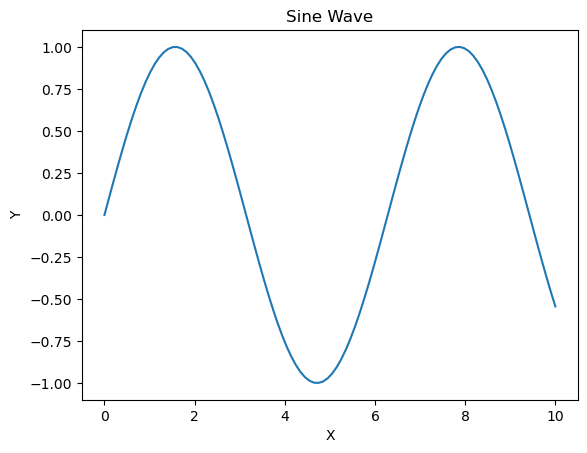

In [25]:
# Example 9: Plot a sine wave

# Generate x and y values 
x = np.linspace(0, 10, 100)  # generate x values with np.linespace()
y = np.sin(x) # generate y values with np.sin()

# Create the XY line plot
plt.plot(x, y)

# Add lables to the plot
plt.title("Sine Wave")  # plot title
plt.xlabel("X")         # x-axis title
plt.ylabel("Y")         # y-axis title

# Display the plot
plt.show()

If your code is correct you should see a plot of a sine wave.

![__](https://biologicslab.co/BIO1173/images/class_01/SineWave.png)

### **Exercise 9: Plot the tangent function using Numpy and Matplotlib**

In the cell below write the code to generate an XY plot of the tanget function. To generate your `x` values use the following arguments for the `np.linespace()` function:
~~~text
x = np.linespace(0, np.pi, 100)
~~~
The term `np.pi` is the NumPy representation of the **`pi`** (3.141592653589793). This is a commonly used constant in various mathematical operations.

To compute the `y` values, pass the `x` values to the `np.tan()` function
~~~text
y = np.tan(x)
~~~
Don't forget to change the plot title.

In [26]:
# Insert your code for Exercise 9 here



If your code is correct you should see the following XY plot:

![_](https://biologicslab.co/BIO1173/images/class_01/tan.png)


## Scatterplots 

A **_scatterplot_** is a type of data visualization that displays the relationship between two numerical variables. It is often used to identify correlations between the two variables. The scatterplot consists of marks (usually dots) which are placed at the intersection of the two variables. The marks can be colored or sized to represent additional variables.  

### Example 10: Scatterplot of sepal length and sepal width in 3 Iris flower species

The Iris flower data set is a popular dataset for exploring machine learning techniques. It contains 150 observations of four numerical variables: 

* sepal length
* sepal width
* petal length
* petal width

The sepals are the outer parts of the flower that enclose a developing bud. In many flowers the sepal is green, but in the Iris, it is brightly colored and looks similar to the petals. The petals are the parts of a flower that are often conspicuously colored.

The following image shows an Iris flower sepal and petal.

![__](https://biologicslab.co/BIO1173/images/class_01/SepalPetal.png)

These measurements were obtained in 3 different Iris species

* _Iris setosa_
* _Iris versicolor_
* _Iris virginica_

A photograph of each Iris species is shown in the next image:

![__](https://biologicslab.co/BIO1173/images/class_01/iris_species.png)

In this example, the Iris flower data will be loaded in memory using the `load_iris()` function from the `sklearn.datasets` module. This function takes no arguments and returns the Iris dataset as a Python _dictionary_. 

Run the next cell to import `load_iris` function from the `sklearn.datasets`.

In [27]:
# RUN THIS CELL TO IMPORT sklearn.datasets
from sklearn.datasets import load_iris

If you get an error when running the cell, you will need to install the package `scikit-learn` package. To do this, uncomment the PIP command in the next cell.

In [28]:
# Uncomment the next line ONLY if you need to install the scikit-learn package
#!pip install scikit-learn

The Iris flower dictionary contains four `key-value pairs`, each of which represent a different feature of the dataset. The keys are `data`, `target`, `target_names`, and `DESCR`. 

* The `data` key contains the feature values. The "features" are the measured lengths and widths of petals and sepals in four different _Iris_ species.
* The `target` key contains the labels for the data points. The "target" is just a number between 0 and 2 representing the 3 species as follows:
    * 0 = _I. setosa_
    * 1 = _I. versicolor_
    * 2 = _I. virginica_
* The `target_names` key contains the names of the labels
* The `DESCR` key contains a description of the dataset. 

In this example the Matplolib function `plt.scatter()` is used to generate a scatterplot of sepal length (as the `x` values) and sepal width (as the `y` values). 

Square bracket indexing is used to extract the values for sepal length and sepal width from the dictionary's `data` key using the following assignments:

`x_data = iris.data[ : , 0 : 1] # sepal lengths in column 0` <br>
`y_data = iris.data[ : , 1 : 2] # sepal widths in column 1`

In this example, `iris.data` is a 150 X 4 array (150 rows, 4 columns). Each row has the measurements from a single iris flower. Since the dataset had measurements from 150 flowers, there are 150 rows. 

Each column contains the a flower's measurements as follows:

* **Column 0:** the flower's sepal length
* **Column 1:** the flower's sepal width
* **Column 2:** the flower's petal length
* **Column 3:** the flower's petal width

As a reminder about how square bracket indexing works, the first index value specified the row(s) to access while the second index value specifies the column(s) to access. The values are separated by a comma **`,`**. 

The x-values in the example below are accessed using the index `[  :  , 0 : 1]`. 

Because the first index value contains a colon, **`:`**,  this tells Python to access a _range_ of rows. Since a specific value for the first row and the last row have been _omitted_, Python will simply use everything from the first row in the data set to the last row. In other words, the notation `   :    ` means access the data in **_all_** of the rows. That makes sense since we want to use _all_ of the Iris flowers in the dataset in our scatterplot.

The second index value, `0 : 1`, specifies the range of columns to access. In this instance, Python is told to access the data starting in column `0` (the first column) and all of the next columns up to, but **not** including the second index value, column `1`. In other words, the notation `0 : 1` means to access on the data in column `0`. 

In the scatterplot below, the x-co:ordinate of each data point (dot) is the measured sepal length of a particular Iris flower while the y-co:ordinate of that same data point, is the flower's sepal width. In other words, the scatterplot will show 150 dots, one dot for each Iris flower. The location of the dots provides a visual representation of sepal lengths and sepal widths. Moreover. the code for generating the scatterplot also provides that the color a data point (dot) will be different depending upon the particular Iris species.  

Further information about the code used for generating and displaying the scatterplot are provided by the comments.
 

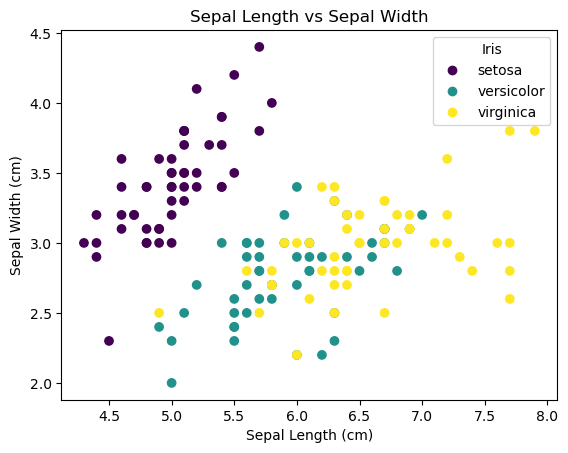

In [29]:
# Example 10: Scatterplot of Iris sepal lengths v sepal widths

# Load the iris dataset as a dictionary
iris = load_iris()

# Extract sepal lengths (x) 
x_data = iris.data[ : , 0 : 1]   # sepal lengths in 1st column

# Extract sepal widths (y) 
y_data = iris.data[ : , 1 : 2]   # sepal widths in 2nd column

# Extract the species number from dictionary
# (0=setosa, 1=versicolor, 2=virginica) 
# These numbers will be used for the different data point colors
species_number = iris.target

# Adjust colors for plotting
norm = plt.Normalize(species_number.min(), species_number.max())

# Plot the data points
plt.scatter(x_data,    # plot sepal lengths as x
            y_data,    # plot sepal widths as y
            c=species_number, # use different color for each species
            cmap='viridis')   # use a prettier color pallete

# Create titles for the main plot, x-axis and y-axis
plt.title("Sepal Length vs Sepal Width")  # main title of the plot
plt.xlabel("Sepal Length (cm)") # title for the x axis
plt.ylabel("Sepal Width (cm)")  # title for the y axis

# The code below is used to the legend

# Specify the colormap for the legend
cmap = plt.get_cmap('viridis')

# Get species names from dictionary
species_labels = iris.target_names

# Define the parameters for dislaying the legend
handles = [plt.Line2D([0, 0], [0, 0], 
          color=cmap(norm(i)), marker='o', 
          linestyle='', label=label)
          for i, label in enumerate(species_labels)]

# Plot the legend
plt.legend(handles=handles, title='Iris')

# The last step is to show the plot
plt.show()


By simple visual inspection it is obvious that the data points are not randomly distributed but display distinct patterns. In particular, there is a clear trend for increases in sepal length to be accompanied by an increase in sepal width. In statistics, this would be called a _positive correlation_. 

There is also a clear difference in the "clustering" of the data points by species. For example, the species _Iris setosa_ (purple dots) has flowers with generally shorter sepal lengths, but wider sepal widths than the other two Iris species, _Iris versicolor_ (green dots) and _Iris virginica_ (yellow dots).

### **Exercise 10: Scatterplot of _petal_ length and _petal_ width in 3 Iris flower species**

For this exercise you are to repeat (i.e. copy and paste) **Example 10** but instead of plotting sepal length versus sepal width, your scatterplot should have **_petal length_** as the `x-values` and **_petal width_** as the `y-values`. 

Values for petal lengths are in column `2` of `iris.data` while petal widths are in column `3` of `iris.data`. To access these values, you will have to use square bracket indexing. If you are uncertain about how to use square bracket indexing in your code below, please re-read Example 10 above.

In [30]:
# Insert your code for Exercise 10 here




If your code is correct your should see the following scatterplot:

![__](https://biologicslab.co/BIO1173/images/class_01/PetalCluster.png)

## **Lesson Turn-in**

When you have completed all of the code cells, and run them in sequential order (the last code cell should be number 27), use the **File --> Print.. --> Save to PDF** to generate a PDF of your JupyterLab notebook. Save your PDF as `Class_01_8.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.